# Laboratório Serverless Data Lake Analytics

O laboratório foi proposto por <a href = "https://www.linkedin.com/in/jo%C3%A3o-lucas-flauzino-cassiano-1b2bb1a4/" target="_blank"> João Lucas Flauzino</a> e <a href = "https://www.linkedin.com/in/mateussilvestre/" target="_blank"> Mateus Silvestre</a> e executado por <a href = "https://www.linkedin.com/in/raquel-bustamante/" target="_blank"> Raquel Bustamante</a>. 

<p>O objetivo final era gerar uma visualização no Power BI dada a seguinte <a href = "https://www.kaggle.com/aungpyaeap/supermarket-sales" target="_blank">base de dados</a> retirada da comunnidade Kaggle, que se trata dos históricos de vendas de uma empresa de supermercado que registrou em 3 filiais diferentes.</p>

## Atividades Propostas

1. Realizar upload do arquivo para o S3 via AWS CLI 
2. Criar um lambda que acione o ETL Job Glue para ler o arquivo e transformar em parquet e salvar no repositório de armazenamento S3 da AWS 
3. Criar crawler no Glue na nuvem da AWS para poder dar select via Athena 
4. Conectar no Athena via PowerBI e criar um dashboard com métricas de vendas

##### Desenho da solução
  
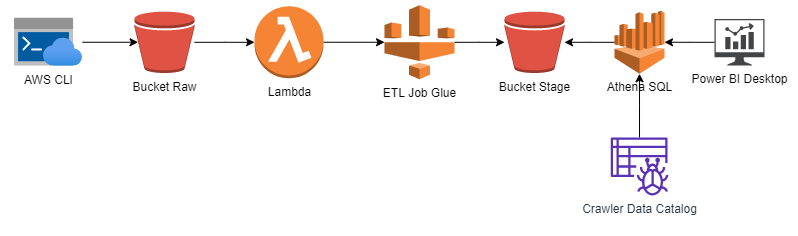

### 1. Realizar upload do arquivo para o S3 via AWS CL

Existem duas formas para explorar os serviços da AWS: 
* Por meio do <a href = "https://aws.amazon.com/pt/console/" target="_blank">console</a>, através de navegadores padrões.
* Pelo <a href = "https://aws.amazon.com/pt/cli/" target="_blank">AWS CLI</a>, diretamente pelo terminal.

<p style="text-align: right; font-size:12px"><a href = "https://medium.com/@amaurybsouza/aws-cli-conhe%C3%A7a-alguns-comandos-e-dicas-que-v%C3%A3o-te-ajudar-no-dia-a-dia-649eaea8c4a5#:~:text=Hoje%20venho%20para%20mostrar%20como,e%20a%20outra%20pelo%20terminal.&text=A%20AWS%20CLI%20abrange%20todos,uso%20via%20linha%20de%20comando." target="_blank">Leitura recomendada</a>: comandos básicos de AWS CLI.</p>

Inicialmente, é necessário instalar o AWS CLI na máquina que executará esses comandos <a href = "https://docs.aws.amazon.com/pt_br/cli/latest/userguide/install-cliv2-windows.html" target="_blank">clicando aqui</a>.  

O segundo passo então é confirmar se foi instalado através do prompt da sua máquina com o código  ` aws --version `. O output deverá ser a versão do AWS instalado em sua máquina.

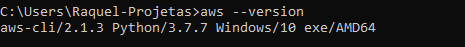

Além disso, é necessário configurar suas credenciais pelo comando ` aws configure `. Ao executar esse comando você deverá preencher os seguintes dados:

`AWS Access Key ID [None]: <your access key>
AWS Secret Access Key [None]: <your secret key>
Default region name [None]: <your region name>
Default output format [None]: ENTER`

Agora, caso não tenha um bucket ainda, é possível criá-lo através do comando `aws s3 mb s3://bucket-name`.
Por fim, para fazer o upload/cópia do seu arquivo local para o bucket, basta executar o código ` aws s3 cp caminho-do-arquivo/nomearquivo.tipo-do-arquivo s3://nome-bucket/`.

<p style="text-align: right; font-size:12px"><a href = "https://qiita.com/alokrawat050/items/56820afdb6968deec6a2" target="_blank">Leitura recomendada</a>: como copiar arquivos locais para o as S3 Bucket.</p>

Recomenda-se que se faça a conferência no S3 se foi de fato copiado o(s) arquivo(s) dentro do bucket.

### 2. Criar um lambda que acione o ETL Job Glue para ler o arquivo e transformar em parquet

#### 2.1. AWS Lambda
Assim como o upload ou criação de bucket, é possível criar um lambda codificando ou pelo console. Neste caso em espefício, usaremos o console.

Inicialmente, é importante entender o conceito de AWS Lamba e para o que ele serve. Segundo o próprio site da Amazon:

> O AWS Lambda permite que você execute código sem provisionar ou gerenciar servidores. Você paga apenas pelo tempo de computação consumido.
Com o Lambda, você pode executar o código para praticamente qualquer tipo de aplicativo ou serviço de back-end, tudo sem precisar de administração. Basta carregar o código e o Lambda se encarrega de todos os itens necessários para executar e alterar a escala do código com alta disponibilidade. Você pode configurar seu código para que ele seja acionado automaticamente por outros serviços da AWS ou chamá-lo diretamente usando qualquer aplicação móvel ou da web.

<p style="text-align: right; font-size:12px"><a href = "https://aws.amazon.com/pt/lambda/" target="_blank">Leitura recomendada</a>: AWS Lambda</p>

É importante ressaltar que 

#### Passo a passo

1. Entrar no console da AWS, procurar em Services por Lambda:
  
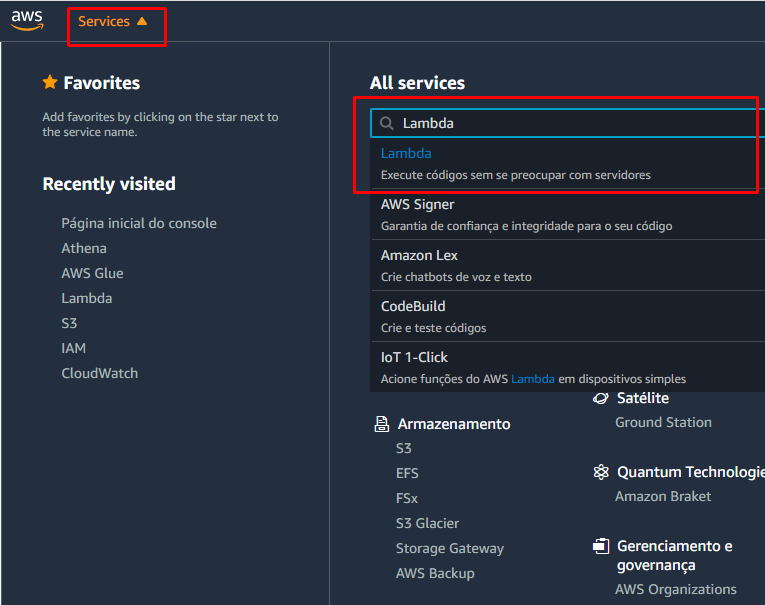
  
2. Na página do console, clique em "Criar função"
  
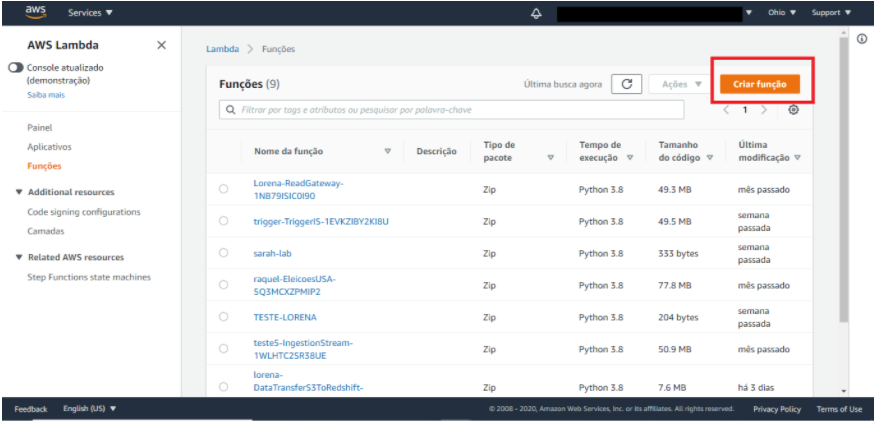
  
3. Na terceira etapa é o momento de preenchimento dos dados da sua função Lambda, qual será o nome, se usará algum esquema já pronto como base, etc. Neste caso, o ideal é escolher a opção "Criar do zero". As configurações subsequentes são padrões, com exceção da **linguagem de programação** que será usada. Para este laboratório foi utilizado Python.
  
4. Na página do Lambda, haverá o **código da função**, onde será realizada a parte de acionamento do ETL Job Glue.
  
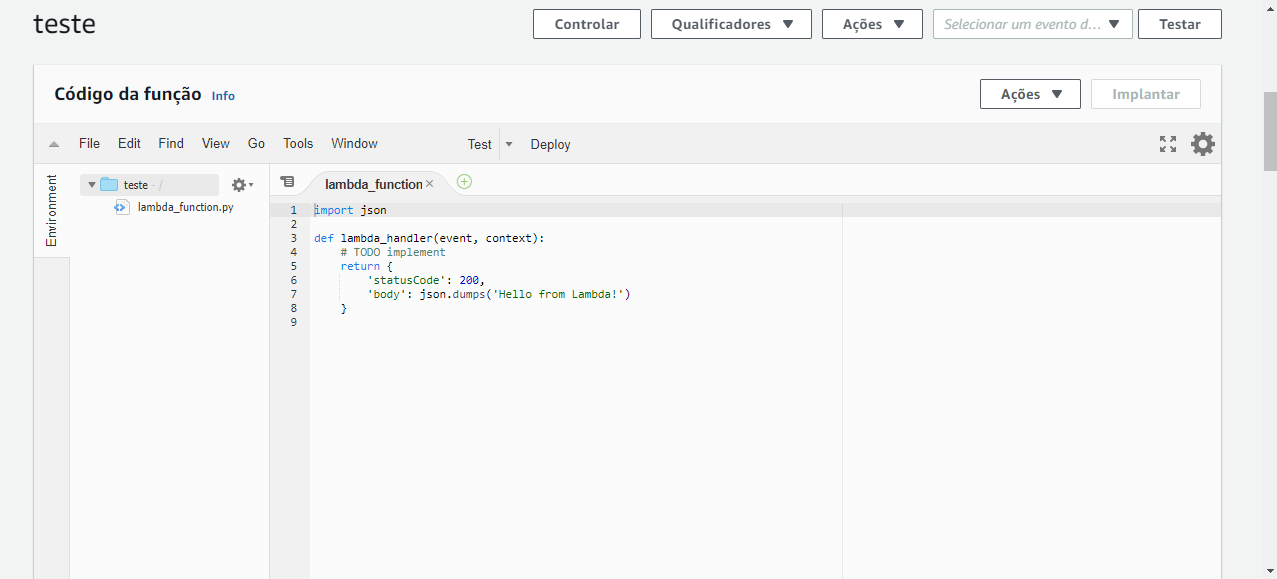

A partir deste ponto o seu Lambda está pronto para ser utilizado, ainda é preciso definir a função para acionar o ETL Job Glue. Contudo, é necessário cria-lo antes de testar e posteriormente voltar à este passo e utlizar o seguinte código:

`# Set up logging
import json
import os`

`# Import Boto 3 for AWS Glue
import boto3
client = boto3.client('glue')`

`# Variables for the job: 
glueJobName = "job-etl`

`# Define Lambda function
def lambda_handler(event, context):
    response = client.start_job_run(JobName = glueJobName)`

#### 2.2. ETL Job Glue
  
O AWS Glue é um serviço de preparação de dados sem servidor que facilita o trabalho de extrair, transformar e carregar (ETL) para engenheiros de dados, bem como o trabalho de extrair, limpar, enriquecer, normalizar e carregar dados para desenvolvedores, analistas de dados e cientistas de dados. O AWS Glue reduz o tempo gasto para iniciar a análise dos dados de meses para minutos.
  
<p style="text-align: right; font-size:12px"><a href = "https://docs.aws.amazon.com/pt_br/glue/latest/dg/author-job.html" target="_blank">Leitura recomendada</a>: Criar trabalhos no AWS Glue</p>

#### Passo a passo

1. Entrar no console da AWS, procurar em Services por AWS Glue:

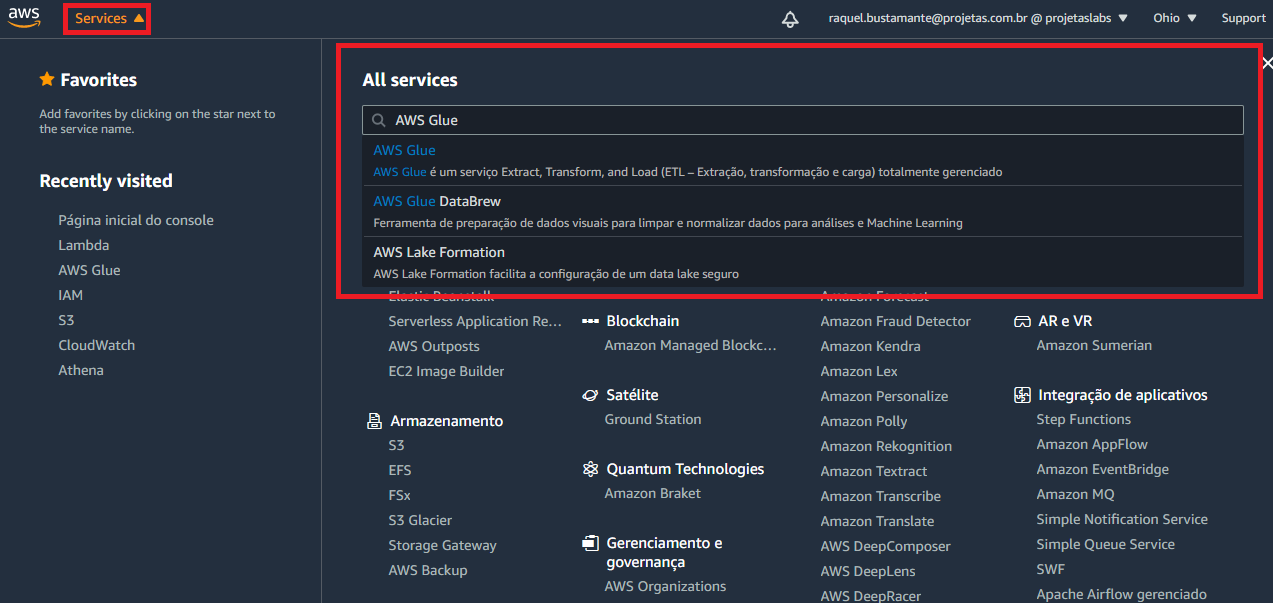
  
2. Adicione um Job
  
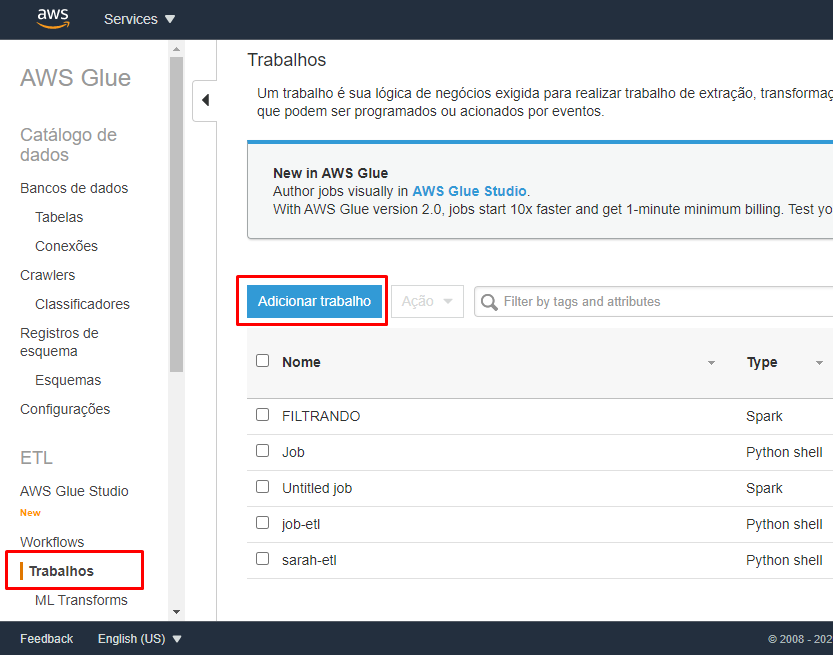
  
3. Preencher os dados pedidos. 
 
Nesse momento é preciso uma atenção especial, pois uma das exigências é a função do IAM. Segundo o site da Amazon:

> O AWS Identity and Access Management (IAM) é um serviço da web que ajuda você a controlar o acesso aos recursos da AWS de forma segura. Você usa o IAM para controlar quem é autenticado (fez login) e autorizado (tem permissões) a usar os recursos.  
Ao criar uma conta da AWS, você começa com uma única identidade de login que tenha acesso total a todos os recursos e serviços da AWS na conta. Essa identidade é chamada de AWS da conta da usuário raiz e é acessada pelo login com o endereço de e-mail e a senha que você usou para criar a conta. Recomendamos que não use o usuário raiz para suas tarefas diárias, nem mesmo as administrativas. Em vez disso, siga as melhores práticas de uso do usuário raiz somente para criar seu primeiro usuário do IAM. Depois, armazene as credenciais usuário raiz com segurança e use-as para executar apenas algumas tarefas de gerenciamento de contas e de serviços.

<p style="text-align: right; font-size:12px"><a href = "https://docs.aws.amazon.com/iam/index.html" target="_blank">Leitura recomendada</a>: AWS Identity and Access Management Documentation</p>
  
Para este laboratório, as configurações padrões são: 
  
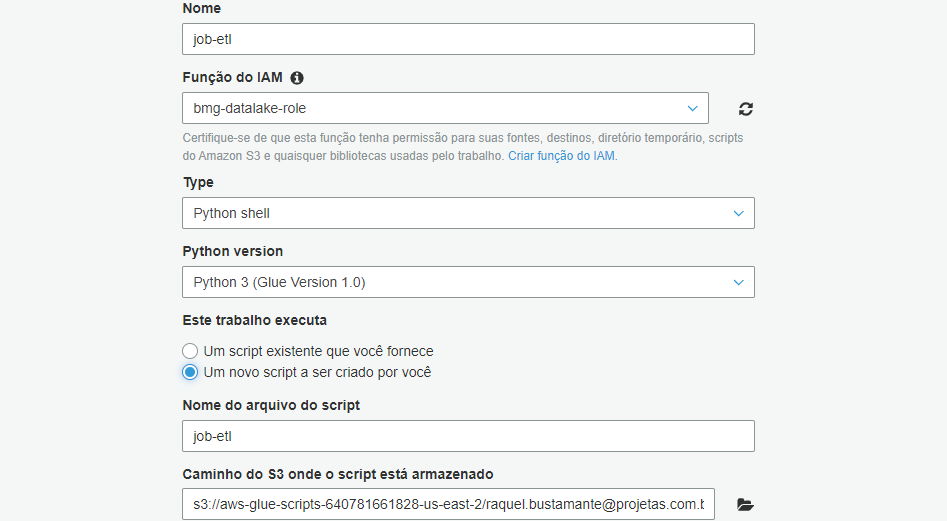
  
4. A tela que será apresentada é onde deverá ser colocado o script para fazer a conversão para parquet
  
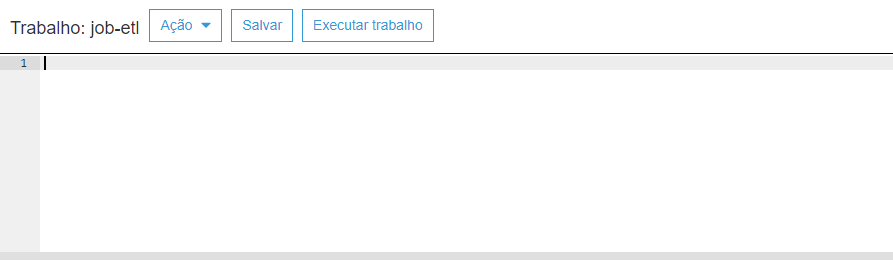
  
O código usado para realizar essa operação é:

`import awswrangler as wr #Biblioteca para realizar manipulações do AWS
import boto3 #Kit de desenvolvimento de software (SDK) da Amazon Web Services (AWS) para Python
import pandas as pd #Biblioteca para manipulação e análise de dados
import io #Biblioteca com principais recursos do Python para lidar com vários tipos de entrada e saída`

`s3 = boto3.client('s3') #Representa o Amazon Simple Storage Service (S3)`

`obj = s3.get_object(Bucket='lab-raquel', Key='lab01/supermarket_sales.csv') #Armazena o documento que será utilizado em obj
df = pd.read_csv(io.BytesIO(obj['Body'].read())) #Leitura do objeto`

`wr.s3.to_parquet( #Transforma o csv em parquet
    df=df,
    path="s3://lab-raquel/lab01/supermarket_sales.parquet" #Salva o arquivo em parquet
)
print (df.head())`

### 3. Criar crawler no Glue na nuvem da AWS para poder dar select via Athena 

Essa etapa também será dividida em duas subetapas para melhor entendimento.

### 3.1. Crawler

Um crawler acessa seu armazenamento de dados, extrai metadados e cria definições de tabela do Catálogo de dados do AWS Glue. O painel Crawlers no console do AWS Glue lista todos os crawlers que você cria. A lista exibe status e métricas da última execução do seu crawler. Assim como o Job, o Crawler também é criado no Glue
  
<p style="text-align: right; font-size:12px"><a href = "https://docs.aws.amazon.com/pt_br/glue/latest/dg/console-crawlers.html" target="_blank">Leitura recomendada</a>: Trabalhar com crawlers no console do AWS Glue</p>

#### Passo a passo

1. Entrar no console da AWS, procurar em Services por AWS Glue:
  
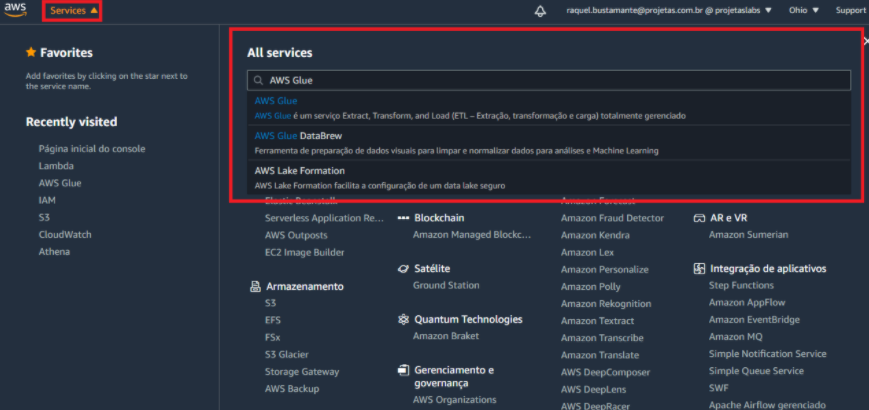
  
2. Adicionar um novo crawler
  
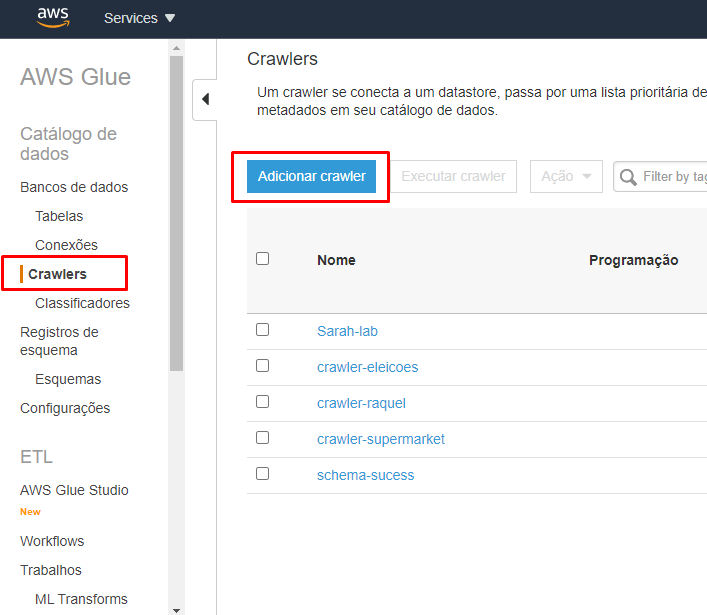
  
3. Agora, basta inserir as informações requeridas, com uma atenção especial para essas etapas:
  
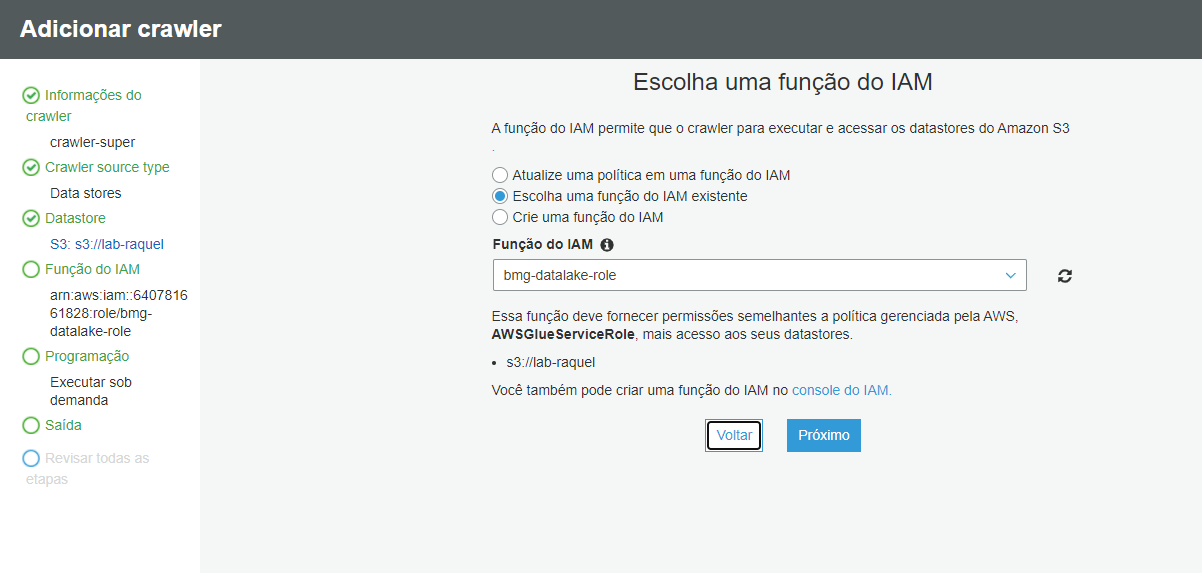
<p style="text-align: center; font-size:13px">Escolher uma IAM já existente</p>
  
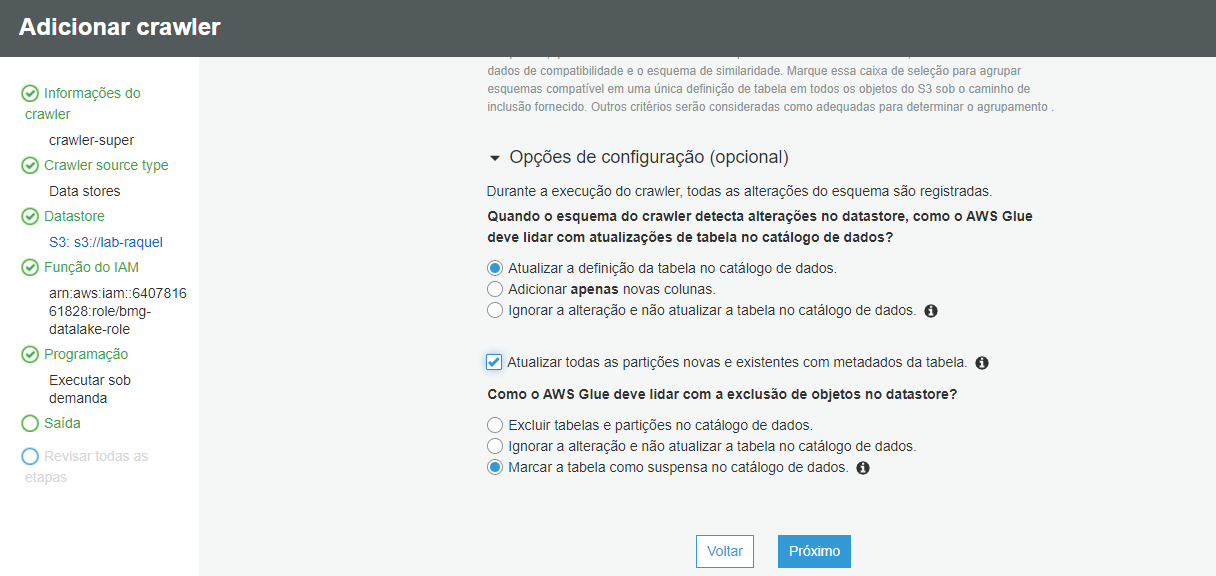
<p style="text-align: center; font-size:13px">Selecionar as opções descritas acima na etapa de <i>Saída</i></p>
  
4. Por fim, basta selecionar e executar o crawler

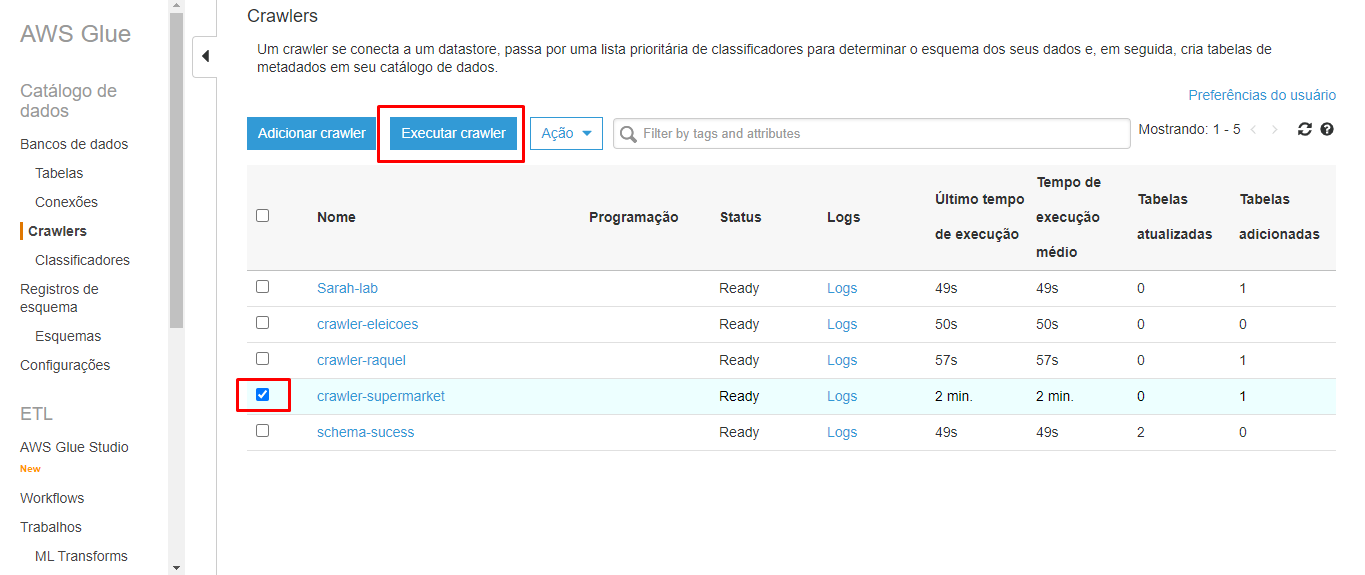
  
5. É possível conferir se a tabela foi adicionada pela aba de banco de dados
  
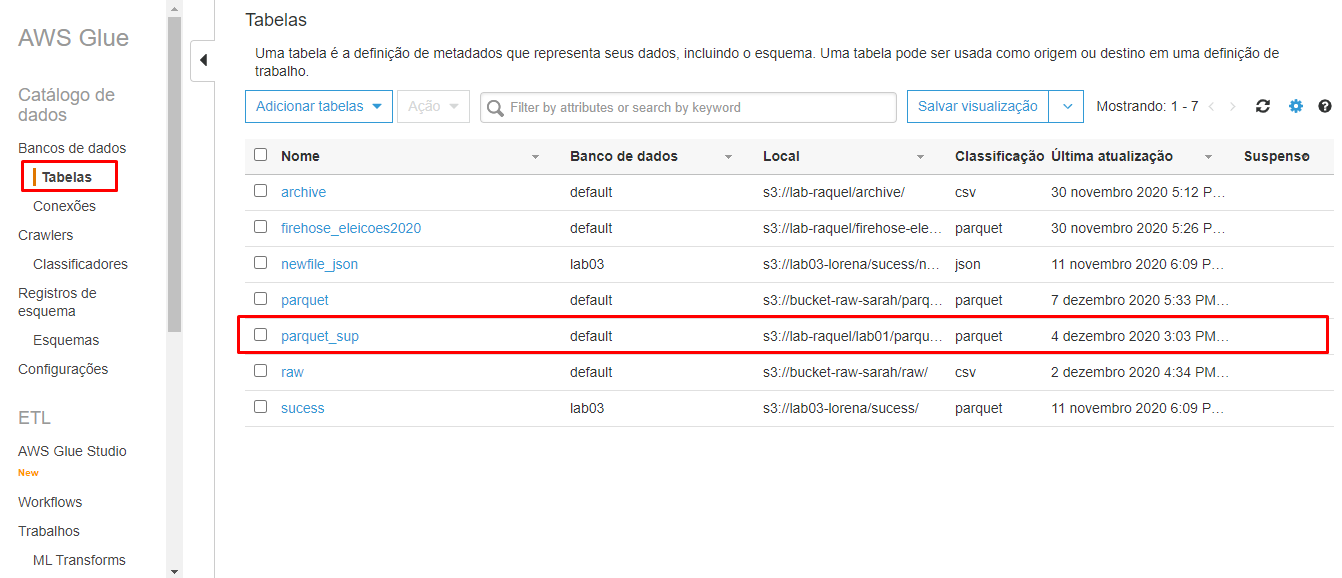

### 3.2. Select no Athena

O Amazon Athena é um serviço de consultas interativas que facilita a análise de dados no Amazon S3 usando SQL padrão. O Athena não precisa de servidor. Portanto, não há infraestrutura para gerenciar e você paga apenas pelas consultas executadas.
  
<p style="text-align: right; font-size:12px"><a href = "https://aws.amazon.com/pt/athena/?whats-new-cards.sort-by=item.additionalFields.postDateTime&whats-new-cards.sort-order=desc" target="_blank">Leitura recomendada</a>: Amazon Athena</p>

#### Passo a passo

1. Entrar no console da AWS, procurar em Services por Athena

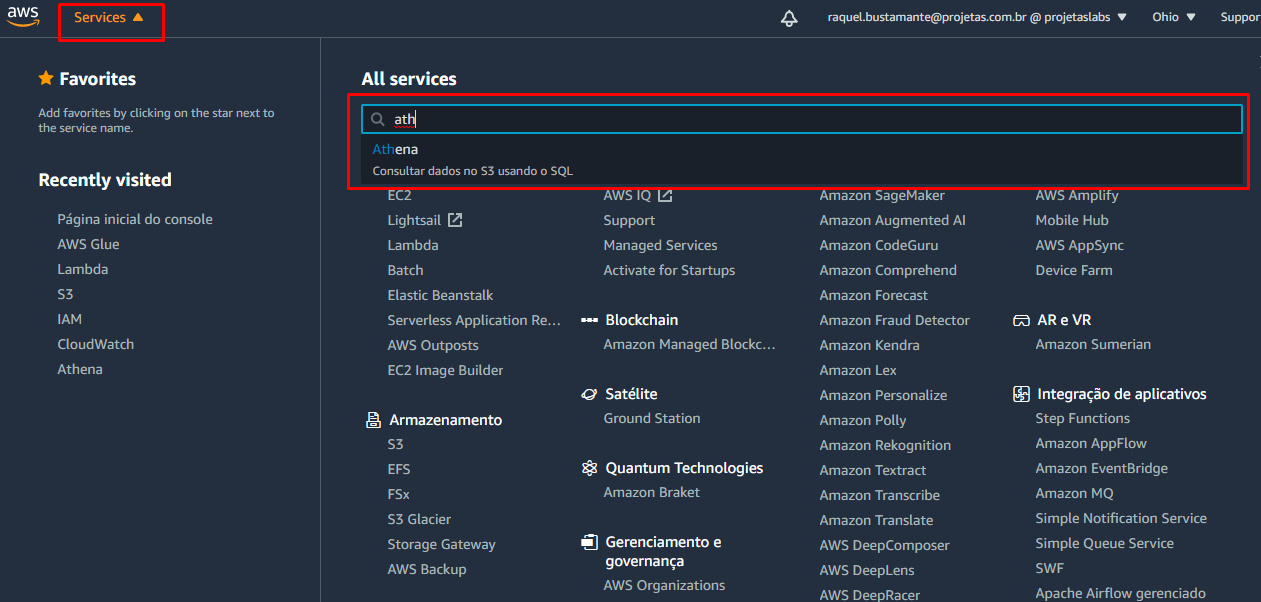
  
2. Agora, basta dar um select para visualizar sua tabela

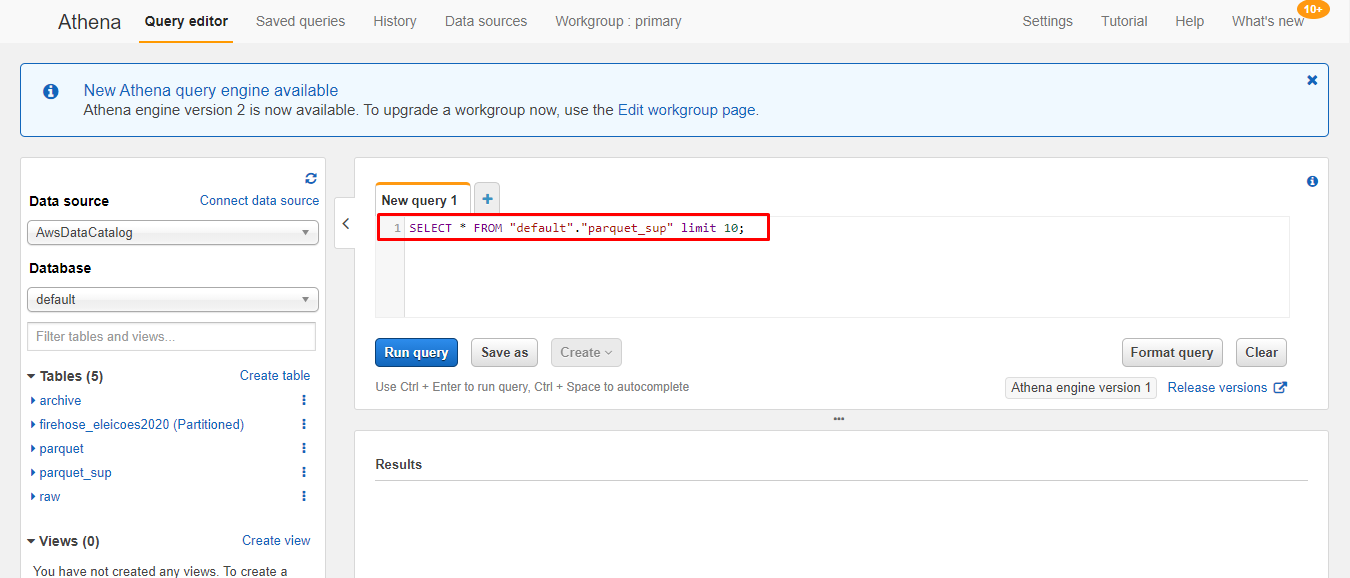

### 4. Conectar no Athena via PowerBI e criar um dashboard com métricas de vendas

Para realizar conexão do Athena via Power BI é necessário realizar <a href = "https://medium.com/@gauravjain6633/connect-microsoft-power-bi-to-amazon-athena-b9f3df41cd36" target="_blank">este tutorial</a> para a configuração do ODBC e ter previamente o Java e as variáveis ambiente instalados na máquina usada. Caso não tenha tenha este passo realizado, essa <a href = "https://www.devmedia.com.br/preparacao-do-ambiente-para-desenvolvimento-em-java/25188" target="_blank"> leitura recomendada</a> irá te auxiliar para tal.

Por fim, este é o resultado do meu dashboard após explorar a base de dados dentro do Power BI:

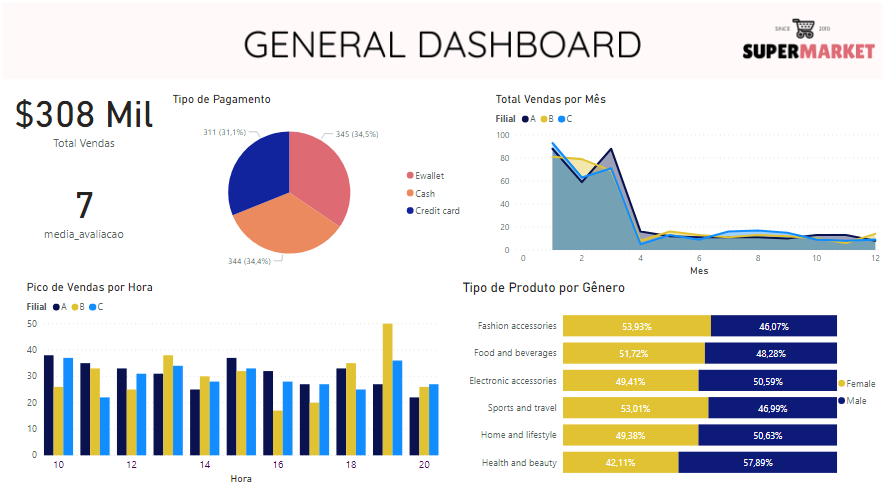

E o seu? Compartilhe comigo o seu resultado pelo <a href ="https://www.linkedin.com/in/raquel-bustamante/"> LinkedIn</a>! Espero que essa leitura tenha sido esclarecedora e de bom aproveito para você. =D